# Practica 10 : Word Cloud

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Lectura del Archivo CSV

In [17]:
df = pd.read_csv('../Data-Treated/fixed_data_who_suicide.csv')

## Generador de WordCloud
### El tamaño del pais depende de la cantidad de suicidios en ese pais

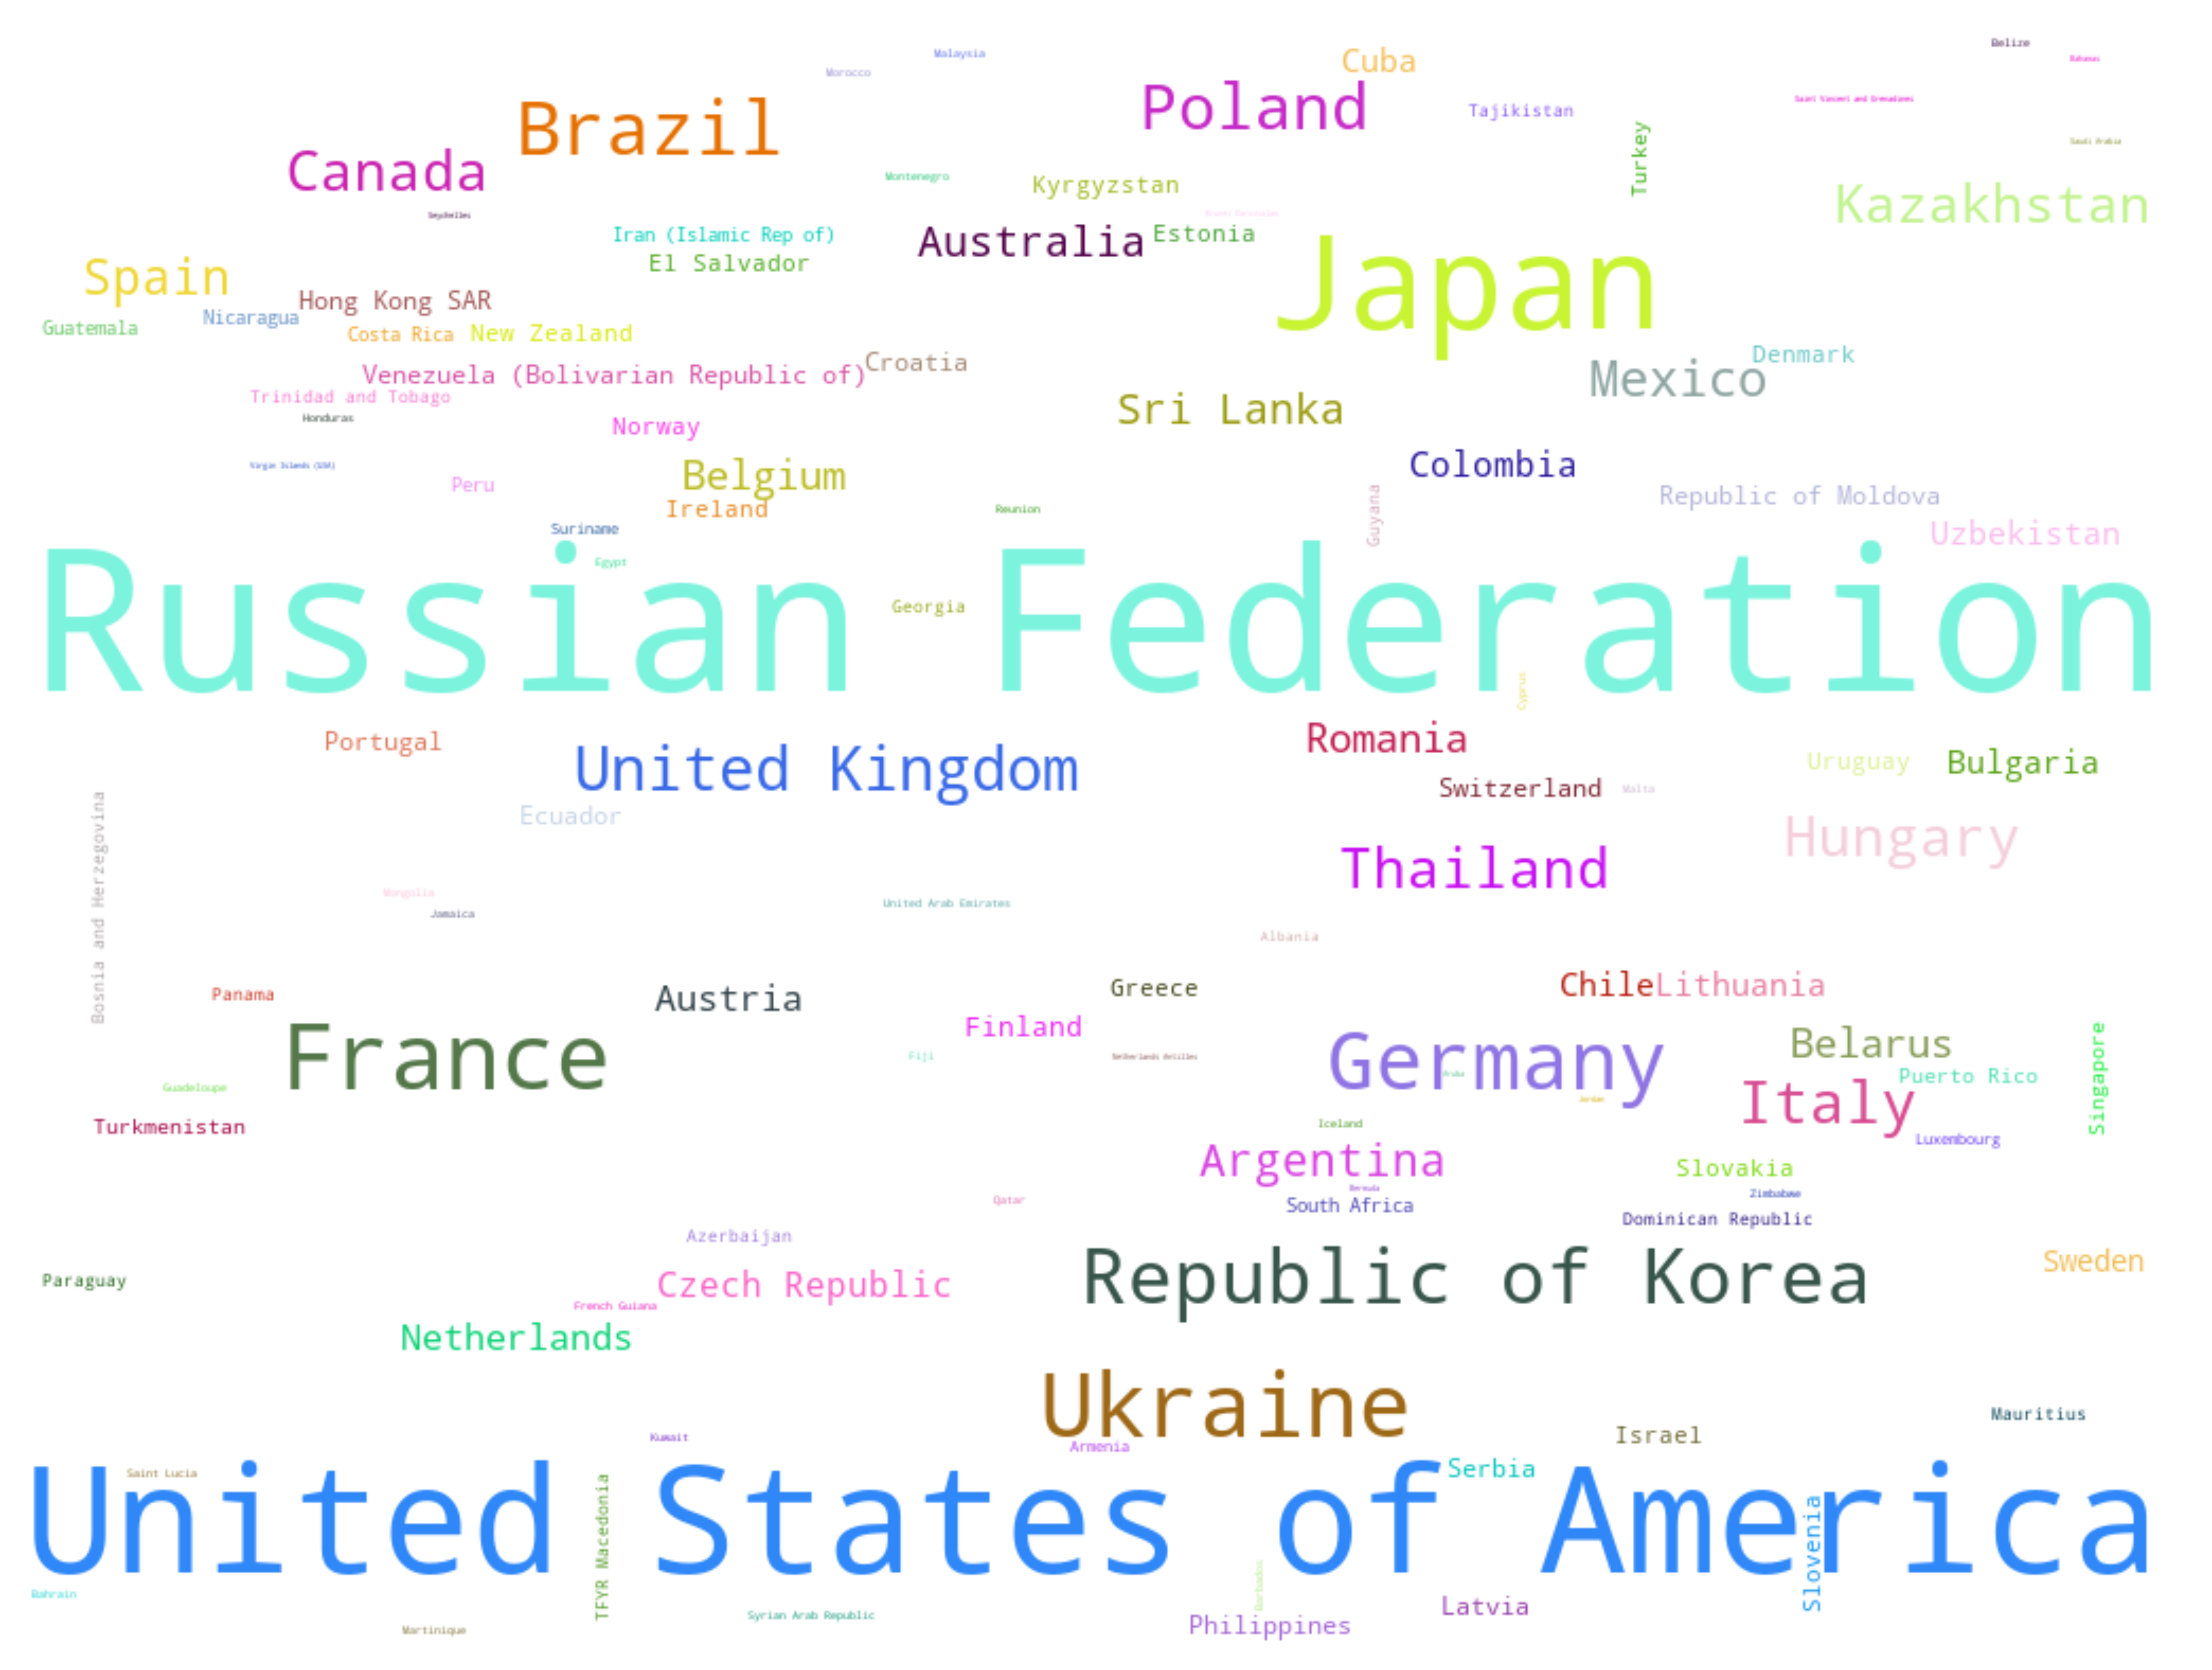

In [18]:
# Agrupa por 'paises' y 'cantidad de suicidios' y suma los valores
resultado = df.groupby(['country'], as_index=False)['suicides_no'].sum()

dict_suicides = dict(zip(resultado['country'], resultado['suicides_no']))

unique_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for _ in dict_suicides]

country_color_dict = dict(zip(dict_suicides.keys(), unique_colors))

wordcloud = WordCloud(
    background_color="white",
    width=1024,
    height=768,
    max_font_size=100,
    color_func=lambda *args, **kwargs: country_color_dict[args[0]]
).generate_from_frequencies(dict_suicides)

px = 1/plt.rcParams['figure.dpi']
plt.figure(figsize=(1024*px, 768*px), facecolor=None, dpi=600)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig('../WordCloud/word_cloud.png', format='png', bbox_inches='tight', pad_inches=0, dpi=600)

plt.show()